### Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import sklearn.neighbors as ngb

This dataset regroups informations regarding FIVB women's players who participated in various official FIVB competitions.
The dataaset contains eight columns that references various characteristics such as the player's height, the player's weight or even the player's position on the volleyball court.

In [2]:
wVb = pd.read_csv('wVb.csv')
wVb.head()
wVb.drop('index', axis = 1, inplace = True)
wVb.duplicated().sum()
wVb.drop_duplicates(inplace = True)

In [3]:
wVb.isna().sum()

name               0
date_of_birth      0
height             0
weight             0
spike              0
block              0
position_number    0
country            0
dtype: int64

To better visualize the position of each player, we change the numeric value (1,2,3,4,6) to ('setter', 'wing', 'middle', 'opposite', 'libero') respectively. 

In [4]:
wVb['position_number'].unique()

array([3, 1, 2, 6, 4], dtype=int64)

In [5]:
conditions = [wVb['position_number'] == 1,
             wVb['position_number'] == 2,
             wVb['position_number'] == 3,
             wVb['position_number'] == 4,
             wVb['position_number'] == 6]

newValues = ['setter', 'wing', 'middle', 'opposite', 'libero']

wVb['position'] = np.select(conditions, newValues)
wVb.head()

,name,date_of_birth,height,weight,spike,block,position_number,country,position
0,Angelina Lazarenko,13/04/1998,193,80,320,305,3,23,middle
1,Svetlana Serbina,15/05/1996,182,71,295,284,1,23,setter
2,Ekaterina Shkurikhina,17/06/1996,190,72,306,296,2,23,wing
3,Kristina Kurnosova,17/06/1997,176,62,288,278,6,23,libero
4,Ekaterina Novikova,07/12/1996,181,70,290,275,1,23,setter


In [6]:
wVb['name'].duplicated().sum()

0

To make the dataset lighter, date of birth, position_number, country and index will be dropped.

In [7]:
wVb.drop(['date_of_birth', 'position_number', 'country'], axis = 1, inplace = True)

In [8]:
wVb.describe().applymap(lambda x: f"{x:0.2f}")

,height,weight,spike,block
count,143.00,143.00,143.00,143.00
mean,180.98,68.71,286.78,275.48
std,8.26,7.38,35.22,33.44
min,153.00,52.00,0.00,0.00
25%,175.50,63.50,285.00,273.00
50%,182.00,69.00,294.00,283.00
75%,187.00,73.00,304.00,292.00
max,199.00,87.00,336.00,310.00


#### Random sampling
For the sample size we use the calculator in https://www.qualtrics.com/uk/experience-management/research/determine-sample-size/ which for a population size o {{wVb.shape[0]}}, confidence level of 95% and margin of error 5%, estimates that a sufficient sample size would be 105.

In [9]:
randWVb = wVb.sample(n = 105)
print('random sample')
print(randWVb.describe().applymap(lambda x: f'{x:.2f}'), '\n')
print('population')
print(wVb.describe().applymap(lambda x: f"{x:0.2f}"))

random sample
       height  weight   spike   block
count  105.00  105.00  105.00  105.00
mean   180.84   69.13  285.80  275.19
std      8.06    7.14   37.45   35.66
min    153.00   52.00    0.00    0.00
25%    176.00   64.00  285.00  274.00
50%    182.00   70.00  293.00  284.00
75%    186.00   73.00  304.00  292.00
max    199.00   87.00  336.00  303.00 

population
       height  weight   spike   block
count  143.00  143.00  143.00  143.00
mean   180.98   68.71  286.78  275.48
std      8.26    7.38   35.22   33.44
min    153.00   52.00    0.00    0.00
25%    175.50   63.50  285.00  273.00
50%    182.00   69.00  294.00  283.00
75%    187.00   73.00  304.00  292.00
max    199.00   87.00  336.00  310.00


It can be seen that the statistical indicators are more or less the same, and are within our margin of error of 5% in most cases.

#### Systematic sampling
In our case, we must build the systematic sample with k = 2, which leads to a reduced sample. We could perform some oversampling technique.

In [39]:
def sysSampling(data, sampleSize):
    
    k1 = int(np.ceil(data.shape[0]/sampleSize))
    start = np.random.randint(0,10)
    firstSample = data.iloc[start::k,:]
    actualSampleSize = firstSample.shape[0]
    
    #Resampling if the actualSampleSize is less than 75% of the desired size
    if actualSampleSize < (sampleSize*0.75):
        rest = pd.concat([data, firstSample]).drop_duplicates(keep = False)
        start2 = np.random.randint(0,10)
        secondSampleSize = sampleSize - actualSampleSize
        k2 = int(np.ceil(rest.shape[0]/secondSampleSize))
        
        secondSample = rest.iloc[start2::k2,:]
        sample = pd.concat([firstSample, secondSample])
    else:
        sample = firstSample
    
    return sample


In [40]:
sampleSize = 105 #this is approximate

sysWVb = sysSampling(wVb, sampleSize)
sysWVb.shape[0]

92

In [41]:
print('Systematic sample')
print(sysWVb.describe().applymap(lambda x: f'{x:.2f}'))
print('population')
print(wVb.describe().applymap(lambda x: f"{x:0.2f}"))

Systematic sample
       height weight   spike   block
count   92.00  92.00   92.00   92.00
mean   180.26  68.10  284.70  273.76
std      8.51   7.80   39.60   37.51
min    153.00  52.00    0.00    0.00
25%    175.00  62.75  280.00  272.00
50%    181.00  69.00  292.50  283.00
75%    186.00  72.25  304.00  290.00
max    199.00  87.00  336.00  310.00
population
       height  weight   spike   block
count  143.00  143.00  143.00  143.00
mean   180.98   68.71  286.78  275.48
std      8.26    7.38   35.22   33.44
min    153.00   52.00    0.00    0.00
25%    175.50   63.50  285.00  273.00
50%    182.00   69.00  294.00  283.00
75%    187.00   73.00  304.00  292.00
max    199.00   87.00  336.00  310.00


### Exercici 2

Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra 
utilitzant SMOTE (Synthetic Minority Oversampling Technique).

In [42]:
strats = wVb.groupby('position')

#### Stratified disportionate
From each stratum pick a random sample. The size of each random sample has no relation with the size of the stratum. In our case, we simply made samples of the same size for each stratum.

In [43]:
def stratSample(df, col, size, prop): #prop is a boolean
    #Create a groupby object
    strats = df.groupby(col)
    auxList = []
    #Calculate the size of each strat, for each mode of the func
    if prop:
        #If we want proportionate strata, we need to match the portion of the population with the sample size.
        rPropSampleSize = np.ceil(size*strats.size()/df.shape[0])
        propSampleSize = list([int(i) for i in rPropSampleSize])
        #If prop, a list of sizes is constructed, so we need a count to indicate which samplesize we want. 
        for count, (name, group) in enumerate(strats):
            #Append the dataframes to a list
            auxList.append(group.sample(propSampleSize[count]))
    else:
        #With disproportionate strata, we assign a single size for each sample.
        disPropSampleSize = int(np.ceil(size/strats.ngroups))
        #Append a random sample of each group in a list
        for name, group in strats:
            if group.shape[0] < disPropSampleSize:
                auxList.append(group) #If the stratum size is smaller than the sample size, take the whole stratum
            else:
                auxList.append(group.sample(disPropSampleSize))
    #Concatenate the dataframes stored in the list
    return pd.concat(auxList, ignore_index = True)    

In [44]:
#Call the function and we have a stratified proportionate sample of the dataframe
stratDispropWVb = stratSample(wVb, 'position', 105, prop = False)
stratDispropWVb[0::10]

,name,height,weight,spike,block,position
0,Kristina Kurnosova,176,62,288,278,libero
10,Yomira Villacorta,164,61,265,250,libero
20,Jovana Kocic,190,85,290,285,middle
30,Elitsa Barakova,184,60,290,280,middle
40,Anna Nicoletti,193,86,306,290,opposite
50,Xiangyu Gong,186,72,313,302,opposite
60,Alessia Orro,180,74,308,231,setter
70,Thais Oliveira,172,69,275,272,setter
80,Dayana Rojas,160,55,178,180,wing
90,Humay Topaloglu,180,63,295,293,wing


In [45]:
print('Stratified disproportionate sample')
print(stratDispropWVb.describe().applymap(lambda x: f'{x:.2f}'))
print('population')
print(wVb.describe().applymap(lambda x: f'{x:.2f}'))

Stratified disproportionate sample
       height weight   spike   block
count   98.00  98.00   98.00   98.00
mean   180.48  68.39  286.32  275.14
std      8.56   7.76   37.35   35.64
min    153.00  52.00    0.00    0.00
25%    175.00  63.00  285.00  275.00
50%    182.00  69.00  293.00  283.00
75%    186.00  72.00  303.50  290.00
max    195.00  87.00  336.00  310.00
population
       height  weight   spike   block
count  143.00  143.00  143.00  143.00
mean   180.98   68.71  286.78  275.48
std      8.26    7.38   35.22   33.44
min    153.00   52.00    0.00    0.00
25%    175.50   63.50  285.00  273.00
50%    182.00   69.00  294.00  283.00
75%    187.00   73.00  304.00  292.00
max    199.00   87.00  336.00  310.00


Even though it differs from the population indicators, it is close enough to satisfy our margin of error of 5%

#### Stratified proportionate
Random samples again, but size will be proportional to the size of the stratum with respect of population. For example, if the stratum libero represents 10% of the players, the sample size we pick from that stratum will be 10% of our total sample size.

In [46]:
stratPropWVb = stratSample(wVb, 'position', 105, prop = True)
stratPropWVb

,name,height,weight,spike,block,position
0,Lais Vasques,171,70,275,274,libero
1,Moeri Hanai,167,60,280,272,libero
2,Leslie Angélica Lopez Flores,169,78,198,190,libero
3,Yomira Villacorta,164,61,265,250,libero
4,Kristina Kurnosova,176,62,288,278,libero
...,...,...,...,...,...,...
103,Lana Conceição,175,72,292,281,wing
104,Qingqing Du,189,72,312,300,wing
105,Slavena Nikova,180,72,290,280,wing
106,Ada Germen,182,62,285,283,wing


In [47]:
print('Stratified proportionate sample')
print(stratPropWVb.describe().applymap(lambda x: f'{x:.2f}'))
print('population')
print(wVb.describe().applymap(lambda x: f'{x:.2f}'))

Stratified proportionate sample
       height  weight   spike   block
count  108.00  108.00  108.00  108.00
mean   180.89   68.61  284.94  273.58
std      8.10    7.15   38.33   36.61
min    160.00   52.00    0.00    0.00
25%    175.00   63.00  284.50  271.50
50%    182.00   69.50  292.50  282.00
75%    186.00   73.00  304.00  290.25
max    199.00   86.00  320.00  310.00
population
       height  weight   spike   block
count  143.00  143.00  143.00  143.00
mean   180.98   68.71  286.78  275.48
std      8.26    7.38   35.22   33.44
min    153.00   52.00    0.00    0.00
25%    175.50   63.50  285.00  273.00
50%    182.00   69.00  294.00  283.00
75%    187.00   73.00  304.00  292.00
max    199.00   87.00  336.00  310.00


The indicators in this case seem to better represent the population.

### Smote
Synthetic minority oversampling technique. If I understand correctly, the algorithm finds the k nearest neighbours to a given point in the minority sample (in our case, it could be the libero class). Then, from those k neighbours, it chooses one at random, and adds a new synthetic sample somewhere in the line that connects the feature sample and the chosen neighbour.
For nearest neighbours, we will use the method sklearn.neighbors.NearestNeighbors(), and the rest will be done manually.
First of all, let's build a random sample and detect the minority class.

In [48]:
sample = wVb.sample(105)
sample.groupby('position').size()

position
libero      12
middle      22
opposite    18
setter      18
wing        35
dtype: int64

For the sake of readability, let's pick only the liberos and the middle blockers. These two classes are very distinct when it comes to height, spike heigth and block height. Also there are typically less liberos than mid blockers, the reason being that you can only have 1 libero in the court, but need two mid blockers. Also, since the libero is a defensive position, there are fewer people interested in playing as libero.

In [49]:
midLib = sample[(sample['position'] == 'libero') | (sample['position'] == 'middle')]

Now we have our majority class (mid blocker), and our minority class (libero), with their wieights and heights. Let's make a scatter plot.

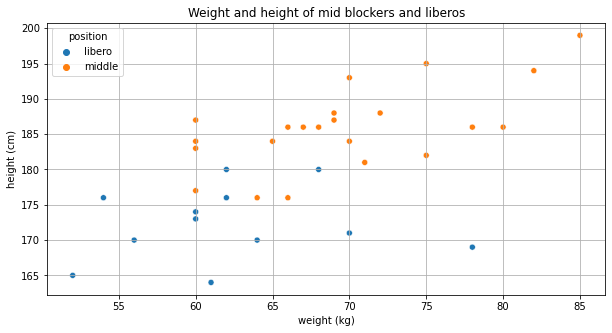

In [50]:
fig, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(data = midLib, x = 'weight', y = 'height', hue = 'position', ax = ax)
ax.set_title('Weight and height of mid blockers and liberos')
ax.set_xlabel('weight (kg)')
ax.set_ylabel('height (cm)')
ax.grid(b = 'True')

Let's perform a SMOTE

In [51]:
midLib.columns

Index(['name', 'height', 'weight', 'spike', 'block', 'position'], dtype='object')

In [53]:
def getNeighbors(data, k):
    #build the nearestneighbors object
    neigh = ngb.NearestNeighbors(n_neighbors = k, algorithm = 'ball_tree').fit(data)
    #Get the distances and the indices of neighbors.
    rDistances, rIndices = neigh.kneighbors(liberoNumbers)
    #The first index is the element itself. The frist distance is always 0., so let's drop them
    return rIndices[1:]

def mySmote(data, indices):
    smoteList = []
    for count, element in enumerate(indices):
        #choose one of the 5 nearest neighbors, at random
        chosen = np.random.randint(0,5)
        #Get a factor that will later help build the synthetic subject
        factor = np.random.random()
        #Get the chosen neighbor from the nearest neighbors
        index = indices[count, chosen]
        #With both positions, construct a vector travelling from the subject to the chosen neighbor
        vector = data.iloc[index,:] - data.iloc[count,:]
        #Construct the newsubjet by multiplying the vector by the factor        
        newpoint = data.iloc[count,:] + factor*vector
        
        smoteList.append(newpoint)
    
    return smoteList   

In [54]:
#Create a dataframe with only the weights and heights.
liberoNumbers = midLib[midLib['position'] == 'libero']
liberoNumbers.drop(['spike', 'block', 'position', 'name'], axis = 1, inplace = True)

#Get a matrix with the indices of the nearest neighbors for each subject. 
#First row is for subject 0, second for subject1...
neighIndices = getNeighbors(liberoNumbers, 5)

newData = pd.DataFrame(mySmote(liberoNumbers, neighIndices))
newData['position'] = 'libero'
newData

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,height,weight,position
0,176.000000,55.783470,libero
1,169.155887,74.570480,libero
2,165.208163,52.624489,libero
3,166.378703,53.378703,libero
4,172.605213,61.394787,libero
5,173.431647,59.431647,libero
6,173.554045,60.044596,libero
7,176.000000,61.011628,libero
8,174.828755,62.090006,libero
9,180.000000,62.545860,libero


Let's concatenate the two dataframes, and plot again

In [107]:
overSampled = pd.concat([midLib, newData], ignore_index = True)
overSampled.tail()

,name,height,weight,spike,block,position
40,NaN,173.554045,60.044596,NaN,NaN,libero
41,NaN,176.000000,61.011628,NaN,NaN,libero
42,NaN,174.828755,62.090006,NaN,NaN,libero
43,NaN,180.000000,62.545860,NaN,NaN,libero
44,NaN,177.215564,63.823346,NaN,NaN,libero


In [95]:
def plotSmote(data, smoteData, suptitle):

    fig, axs = plt.subplots(ncols = 2, figsize = (20,5))

    flatAxs = axs.flatten()
    sns.scatterplot(data = data, x = 'weight', y = 'height', hue = 'position', ax = flatAxs[0])
    sns.scatterplot(data = smoteData, x = 'weight', y = 'height', hue = 'position', ax = flatAxs[1])

    for count, ax in enumerate(flatAxs):
        ax.grid(b = True)
        ax.set_xlabel('weight(kg)')
        ax.set_ylabel('height(cm)')

        if count == 0:
            ax.set_title('Original sample')
        else:
            ax.set_title('Synthetic oversampling with SMOTE')

    fig.suptitle(suptitle)

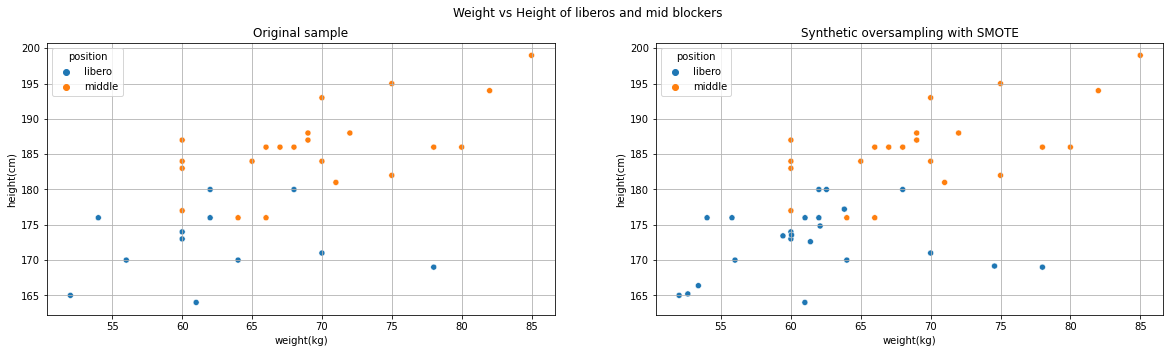

In [97]:
plotSmote(midLib, overSampled, 'Weight vs Height of liberos and mid blockers')

On the other hand, we have an already defined SMOTE technique in python from the package imblearn. Let's try it

In [100]:
import imblearn

In [101]:
#drop the columns that do not contain either position or numbers
midLibNumbers = midLib.drop(['spike', 'block', 'name'], axis = 1)
#change the position to a binary value 1 for libero, 0 for mid blocker
midLibNumbers['bPosition'] = [1 if x == 'libero' else 0 for x in midLibNumbers['position']]
midLibNumbers.head()

,height,weight,position,bPosition
3,176,62,libero,1
46,170,56,libero,1
66,199,85,middle,0
21,171,70,libero,1
132,165,52,libero,1


In [102]:
#drop the position column and then perform the SMOTE
midLibNumbers.drop('position', axis = 1, inplace = True)
smote = imblearn.over_sampling.SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(midLibNumbers, midLibNumbers['bPosition'])
X_sm.tail()

,height,weight,bPosition
39,168,63,1
40,173,60,1
41,168,55,1
42,170,63,1
43,172,67,1


To better plot, change the bPosition column back to position

In [103]:
X_sm['position'] = ['libero' if x ==1 else 'middle' for x in X_sm['bPosition']]

In [104]:
X_sm.tail()

,height,weight,bPosition,position
39,168,63,1,libero
40,173,60,1,libero
41,168,55,1,libero
42,170,63,1,libero
43,172,67,1,libero


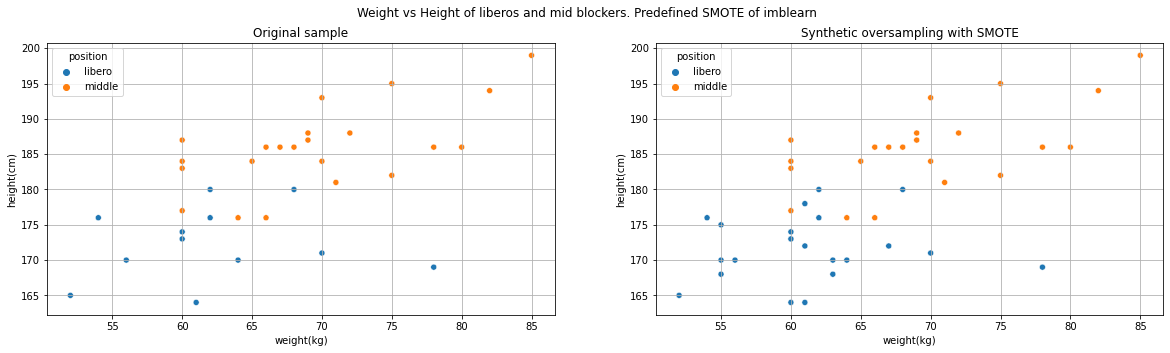

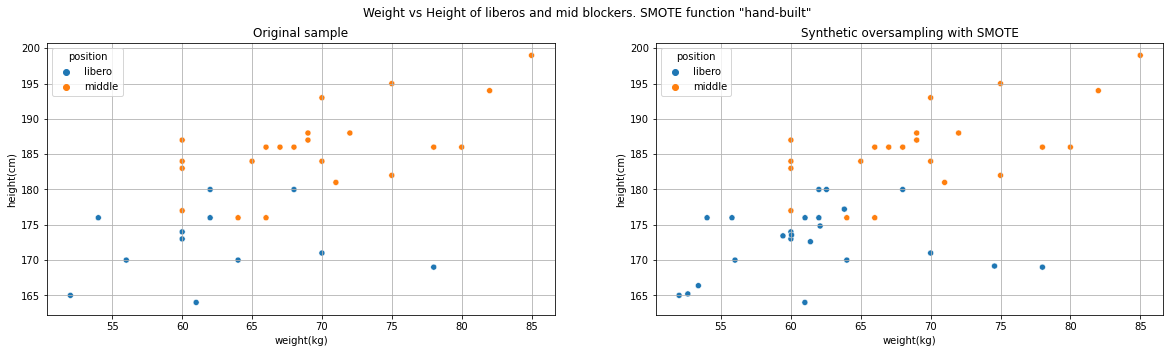

In [106]:
plotSmote(midLib, X_sm, 'Weight vs Height of liberos and mid blockers. Predefined SMOTE of imblearn')
plotSmote(midLib, overSampled, 'Weight vs Height of liberos and mid blockers. SMOTE function "hand-built"')

### Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

Note: There are various forms of implementing this algorithm already written in the internet, but I find that all of them sort of define a ceiling number N explicitly. I will try and make a method that does not involve defining N.

First, we need to assign an index, for each element in the database. Luckily, the DataFrame object of pandas, can be label based (most typically to select columns), or index based (most typically to select rows). Since each element of the DataFrame is a row, we can construct a list, containing all the indices in the DataFrame.

In [113]:
wVb.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            133, 134, 135, 136, 137, 138, 139, 140, 141, 143],
           dtype='int64', length=143)

While we do not know the number of iterations (we don't know the length of the list), the number of iterations is fixed thanks to the list object having the methods \_\_iter__() \_\_next__() built in, so we can actually use a for each loop, instead of a while loop. In the list of indices, each index is indexed with itself (ie, index 107 in the DataFrame occupies the position 107 in the indices list). With this we can avoid enumerate. This approach is general, so the method can be reused in the future for other DataFrames. The algorithm was extracted from https://en.wikipedia.org/wiki/Reservoir_sampling. It is the Algorithm R. I could not wrap my head around algorithm L.

In [170]:
def reservoirSampling(data, k):
    wholeList = list(data.index)
    
    #empy output list
    reserList = []
    
    for item in wholeList:
        #Fill the first k positions of reserList
        
        if item < k:
            reserList.append(item)
            
        # for item in position >= k
        else:
            #Generate a random number between 0 and its index. Since in our case index=item, we do not need
            #to locate the item in the list
            rInt = np.random.randint(0, item + 1)
            #If the random number is less than k (falls inside the len range of our output list)
            if rInt < k:
                #replace the element in the output list with position rInt, with the item in the current iteration
                reserList[rInt] = item
    return data.iloc[reserList]

So let's make a reservoir sample of 105 volleyball players.

In [171]:
#To ensure we ware dealing with a list of indices as described, we can perform a reset_index to the dataframe
reservoirSample = reservoirSampling(wVb.reset_index(drop = True), 105)
reservoirSample

,name,height,weight,spike,block,position
0,Angelina Lazarenko,193,80,320,305,middle
1,Svetlana Serbina,182,71,295,284,setter
2,Ekaterina Shkurikhina,190,72,306,296,wing
3,Kristina Kurnosova,176,62,288,278,libero
140,Cemre Janset Erkul,184,65,298,295,middle
...,...,...,...,...,...,...
100,Malak Badawy,175,64,273,289,opposite
111,Cristina Cuba,176,65,280,275,setter
102,Rahma Almohandes,175,63,277,265,wing
141,Arelya Karasoy,181,73,287,280,setter


In [173]:
print(reservoirSample.describe().applymap(lambda x: f"{x:0.2f}"))
print(wVb.describe().applymap(lambda x: f"{x:0.2f}"))

       height  weight   spike   block
count  105.00  105.00  105.00  105.00
mean   181.19   68.62  285.85  275.74
std      7.90    7.04   38.65   36.35
min    160.00   52.00    0.00    0.00
25%    175.00   63.00  285.00  275.00
50%    182.00   69.00  294.00  284.00
75%    187.00   72.00  304.00  295.00
max    199.00   87.00  322.00  308.00
       height  weight   spike   block
count  143.00  143.00  143.00  143.00
mean   180.98   68.71  286.78  275.48
std      8.26    7.38   35.22   33.44
min    153.00   52.00    0.00    0.00
25%    175.50   63.50  285.00  273.00
50%    182.00   69.00  294.00  283.00
75%    187.00   73.00  304.00  292.00
max    199.00   87.00  336.00  310.00


It is shown that even though the min and max values are somewhat different, the mean, std  and even the percentile values are consistent with the population ones.